In [11]:
import collections
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import importlib

In [217]:
import PIPPET
import utils
importlib.reload(PIPPET)
importlib.reload(utils)
TWO_PI = 2*np.pi

In [13]:
#%matplotlib inline
#%config InlineBackend.figure_formats = ['svg']

plt.style.use('default')
  
DPI = 600
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = DPI
plt.rcParams['figure.autolayout'] = False
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12
sns.set_context('paper', font_scale=0.9)

# Isochronous tapping

In [148]:
#np.random.seed(0)

p = PIPPET.PIPPETParams()
p.dt = 0.002
p.overtime = 200

p.sigma_phi = .2#0.125
p.mu_0 = 0
p.V_0 = np.pi/5
p.eta_mu = .5
p.eta_e = 0.0
p.eta_V = 0.00
p.eta_alpha = 1
p.movement_updating = 1
p.movement_precision = 0
p.start_tapping = 0.0
p.tau = 1*TWO_PI#1*TWO_PI

times = np.array([0.0])
e_means = np.array([0.0])
e_vars = np.array([.02])
e_lambdas = np.array([1])
lambda_0 = 0
p.add(times, e_means, e_vars, e_lambdas, lambda_0, 'tap')

m = PIPPET.movingPIPPET(p)

m.run()


AttributeError: 'PIPPETParams' object has no attribute 'delay'

In [ ]:

fig, ax1, ax2 = utils.plot_movingPIPPET(m, wippet=True, figsize=(10, 3), xmax=10)

ITIs = np.diff(m.streams[0].e_times_p)
AC = np.mean((ITIs[1:]-np.mean(ITIs)) * (ITIs[:-1]-np.mean(ITIs)))
ITI_var = np.var(ITIs)
var_m = -AC
var_c = ITI_var-2*var_m
print('var_m: ', var_m)
print('var_c: ', var_c)
#fig.savefig('figures/fig_movingpippet.jpeg', bbox_inches='tight');

In [ ]:
0006
004


### Phase shift examples

In [241]:
shifts = [100, 10, -10, -100]
models = []
models2 = []
models3 = []
asyncs = []
asyncs2 = []
asyncs3 = []
e_var_self = 0.08
e_var_self_autistic = 0.05
e_var_other = 0.03
p = PIPPET.PIPPETParams()
p.dt = 0.002
p.overtime = .4

#p.sigma_phi = .2
p.sigma_phi = .4
p.mu_0 = 0
p.V_0 = np.pi/5
p.eta_mu = 0#.5
p.eta_e = 0.0
p.eta_V = 0.00
p.eta_alpha = 0#1
p.movement_updating = 2 #.05
p.movement_precision = 0
p.start_tapping = 0.0
p.tau = 2*TWO_PI#1*TWO_PI
p.delay = 0
p.sync_radius = 1

p2 = copy.deepcopy(p)

times = np.array([])
e_means = np.array([0.0])
e_vars = np.array([e_var_other])
e_vars_self = np.array([e_var_self])
e_vars_self_aut = np.array([e_var_self_autistic])
e_lambdas = np.array([.1])
lambda_0 = 0.0001

p.add(times, e_means, e_vars_self, e_lambdas, lambda_0, 'tap')
p2.add(times, e_means, e_vars_self_aut, e_lambdas, lambda_0, 'tap')


for i in range(len(shifts)):
    e_times_nome = np.append(np.append(np.arange(1, 5)/2, (5/2+shifts[i]/1000)), np.arange(6, 11)/2 )
    print(e_times_nome)
    p1 = copy.deepcopy(p)
    p1.add(e_times_nome, e_means, e_vars, e_lambdas, lambda_0, 'nome')
    p1.start_tapping =2.7
    m = PIPPET.movingPIPPET(p1)
    
    models.append(m)
    m.run()
    all_ts_self = np.append(np.nan*np.zeros(sum(e_times_nome<p1.start_tapping)), m.streams[0].e_times_p)
    print(m.streams[0].e_times_p)
    
    altered_nome_times = e_times_nome
    this_async = (all_ts_self - m.streams[1].e_times_p)
    this_async[4]=this_async[4]*0
    asyncs.append(this_async)
   
    p1.start_tapping = 0
    m = PIPPET.movingPIPPET(p1)
    models2.append(m)
    m.run()
    all_ts_self = np.append(np.nan*np.zeros(sum(e_times_nome<p1.start_tapping)), m.streams[0].e_times_p)
    print(m.streams[0].e_times_p)
    
    altered_nome_times = e_times_nome
    this_async = (all_ts_self - m.streams[1].e_times_p)
    this_async[4]=this_async[4]*0
    asyncs2.append(this_async)
    
    p_aut = copy.deepcopy(p2)
    p_aut.add(e_times_nome, e_means, e_vars, e_lambdas, lambda_0, 'nome')
    p_aut.start_tapping = 0
    m = PIPPET.movingPIPPET(p_aut)
    models3.append(m)
    m.run()
    all_ts_self = np.append(np.nan*np.zeros(sum(e_times_nome<p_aut.start_tapping)), m.streams[0].e_times_p)
    print(m.streams[0].e_times_p)
    
    altered_nome_times = e_times_nome
    this_async = (all_ts_self - m.streams[1].e_times_p)
    this_async[4]=this_async[4]*0
    asyncs3.append(this_async)
    

[0.5 1.  1.5 2.  2.6 3.  3.5 4.  4.5 5. ]
[3.076 3.538 4.018 4.508 5.004]
[0.498 1.    1.5   2.    2.5   3.032 3.514 4.006 4.504 5.002]
[0.498 1.    1.5   2.    2.5   3.014 3.508 4.004 4.502 5.002]
[0.5  1.   1.5  2.   2.51 3.   3.5  4.   4.5  5.  ]
[3.008 3.504 4.002 4.502 5.002]
[0.498 1.    1.5   2.    2.5   3.006 3.504 4.002 4.502 5.002]
[0.498 1.    1.5   2.    2.5   3.006 3.504 4.002 4.502 5.002]
[0.5  1.   1.5  2.   2.49 3.   3.5  4.   4.5  5.  ]
[2.994 3.498 4.    4.5   5.   ]
[0.498 1.    1.5   2.    2.5   2.996 3.498 4.    4.5   5.   ]
[0.498 1.    1.5   2.    2.5   2.996 3.498 4.    4.5   5.   ]
[0.5 1.  1.5 2.  2.4 3.  3.5 4.  4.5 5. ]
[2.938 3.48  3.992 4.498 5.   ]
[0.498 1.    1.5   2.    2.494 2.974 3.49  3.996 4.5   5.   ]
[0.498 1.    1.5   2.    2.494 2.98  3.492 3.996 4.498 5.   ]


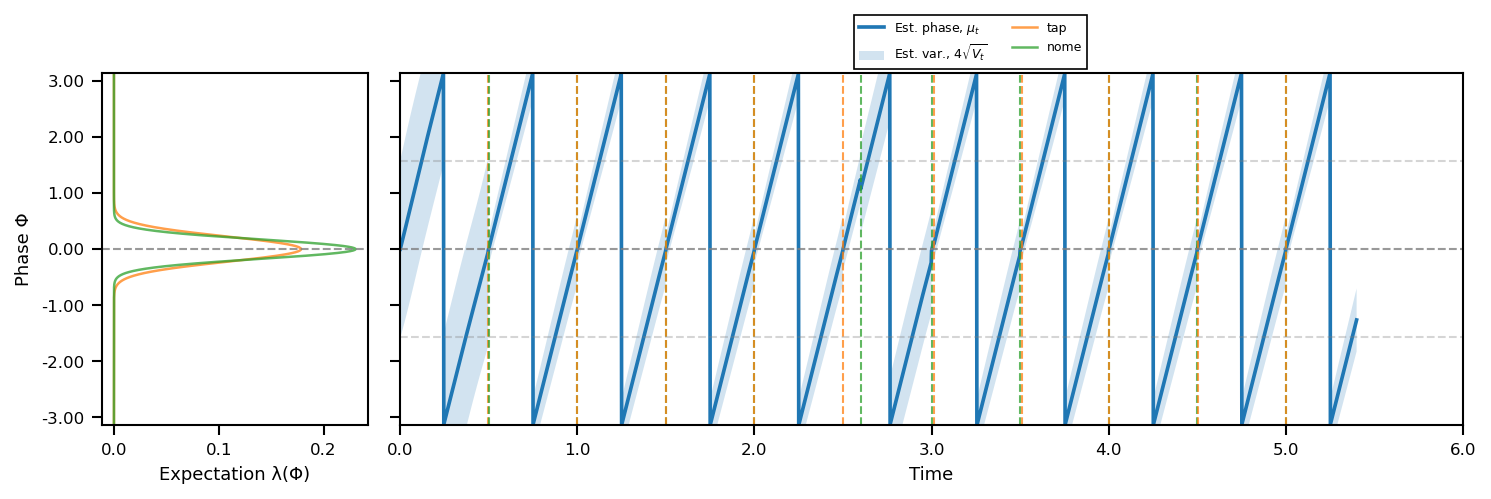

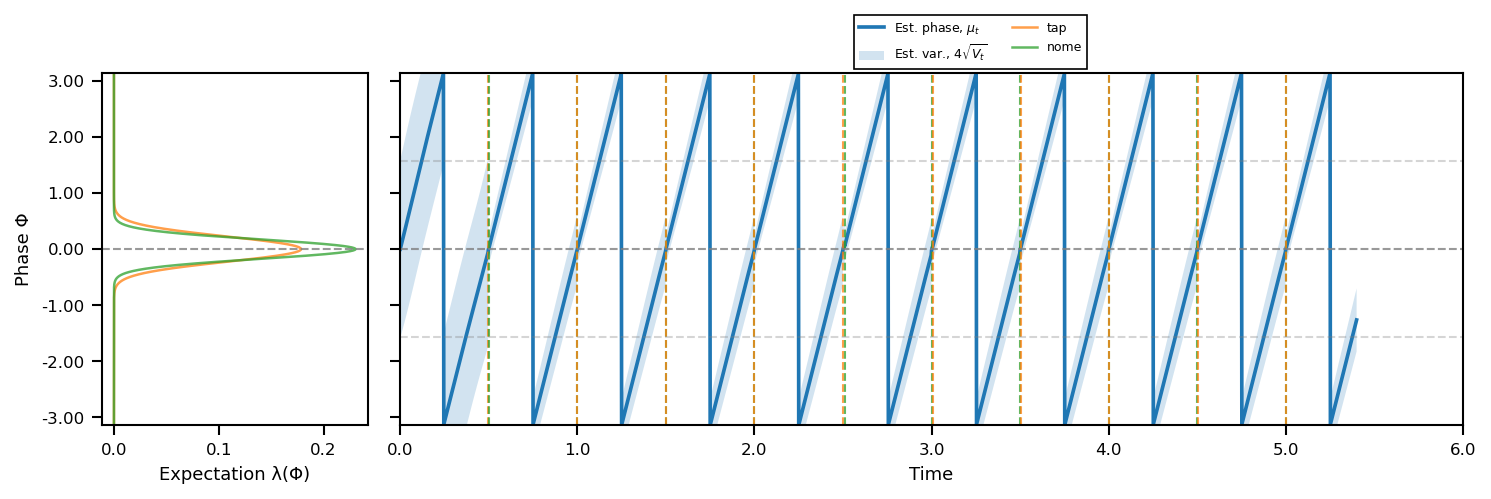

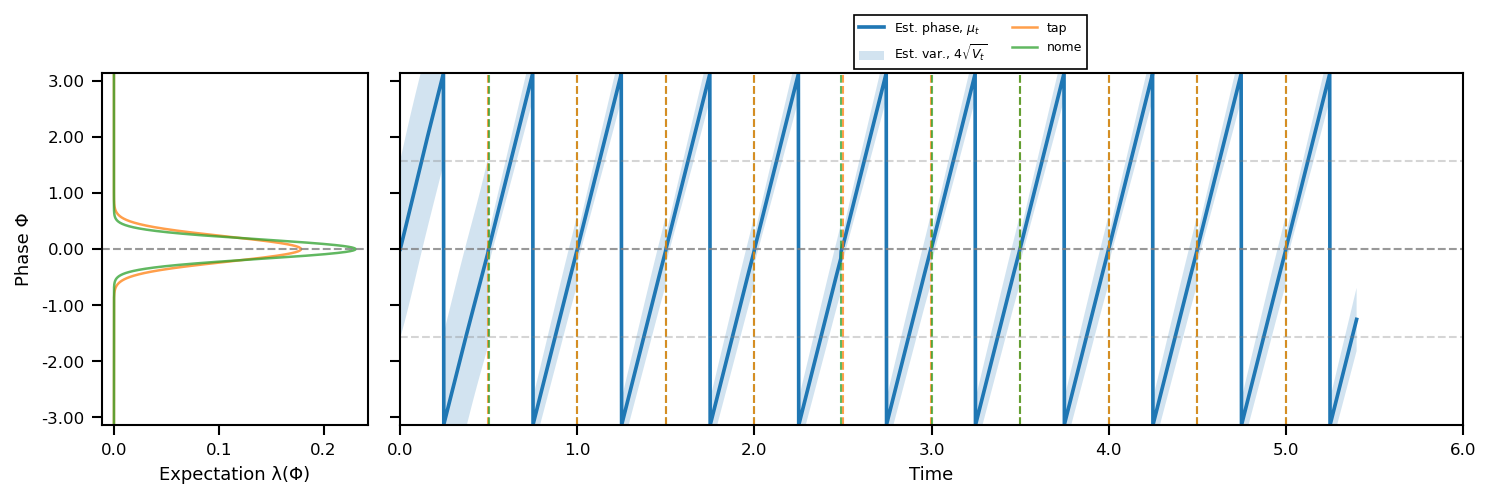

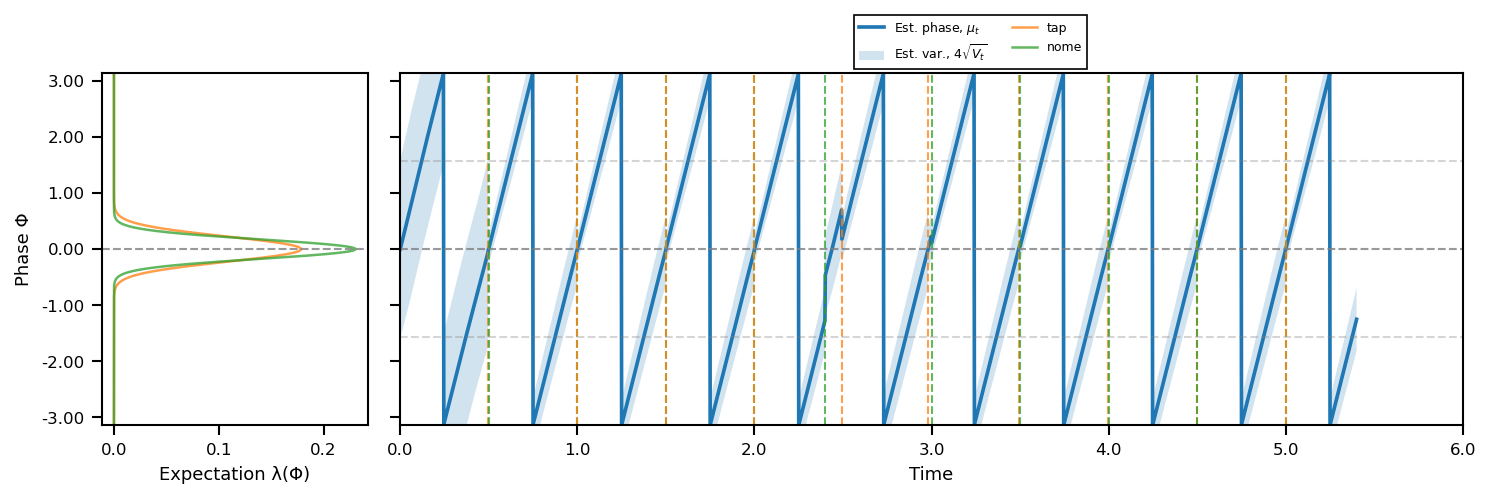

In [243]:
for i in range(len(shifts)):
    fig, ax1, ax2 = utils.plot_mPIPPET(models3[i], wippet=True, figsize=(10, 3), xmax=6)

(2.0, 3.0)

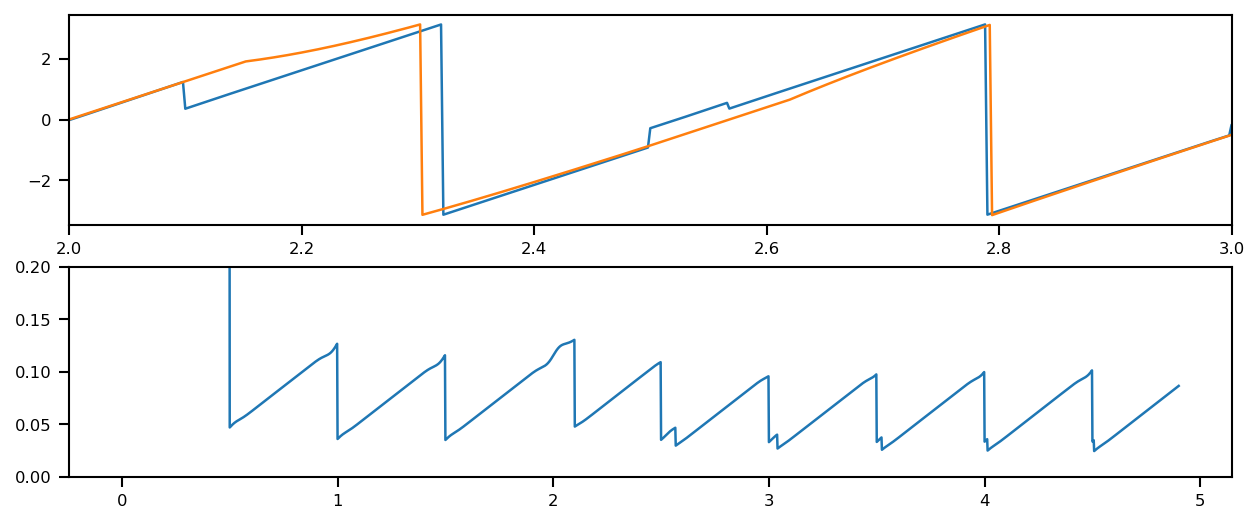

In [198]:
n= 0

f, axs = plt.subplots(2, 1, figsize=(10, 4))
axs[0].plot(models[n].ts, np.angle(models[n].z_s))
axs[0].plot(models[n].ts, np.angle(models[n].alpha_s))
axs[1].plot(models[n].ts, models[n].V_s)
axs[1].set_ylim([0,.2])
axs[0].set_xlim([2,3])

(-80.0, 100.0)

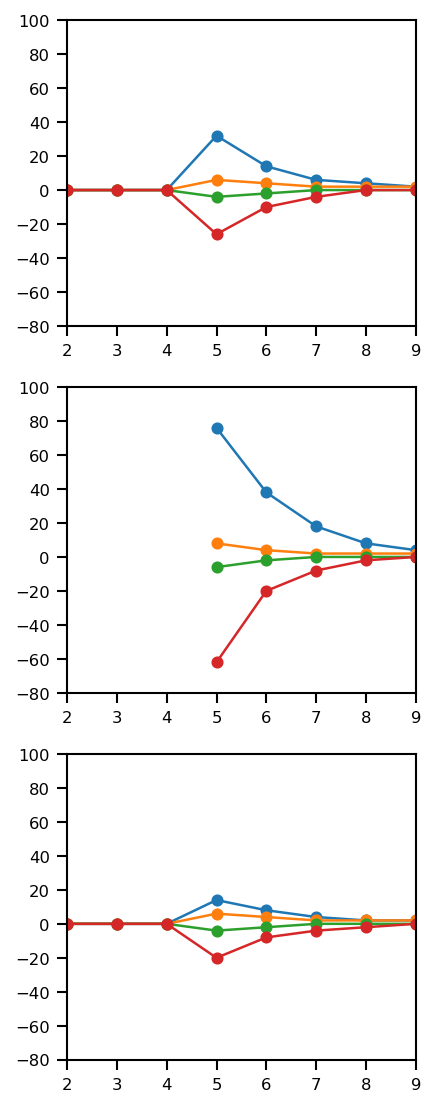

In [242]:
#plt.plot(np.angle(models[0].z_s[0:10000]))
#plt.plot(np.angle(models[0].alpha_s[0:10000]))

f, axs = plt.subplots(3, 1, figsize=(3, 9))

for i in range(len(shifts)):
    axs[0].plot(np.arange(len(asyncs2[i])), asyncs2[i]*1000, '-o')
axs[0].set_xlim([2, 9])
axs[0].set_ylim([-80, 100])

for i in range(len(shifts)):
    axs[1].plot(np.arange(len(asyncs[i])), asyncs[i]*1000, '-o')
axs[1].set_xlim([2, 9])
axs[1].set_ylim([-80, 100])

for i in range(len(shifts)):
    axs[2].plot(np.arange(len(asyncs3[i])), asyncs3[i]*1000, '-o')
axs[2].set_xlim([2, 9])
axs[2].set_ylim([-80, 100])

(-0.9, 0.8)

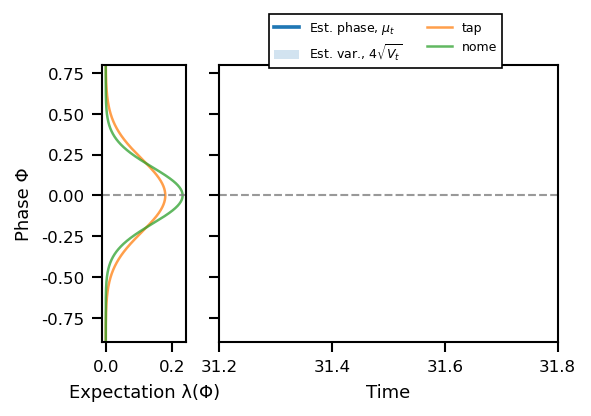

In [246]:
fig, ax1, ax2 = utils.plot_mPIPPET(models3[1], wippet=True, figsize=(4, 2.5), xmax=30)
ax2.set_xlim([31.2,31.8])
ax2.set_ylim([-.9, .8])
ax1.set_ylim([-.9, .8])

In [ ]:
for i in range(len(shifts)):
    fig, ax1, ax2 = utils.plot_mPIPPET(models2[i], wippet=True, figsize=(10, 3), xmax=80)

In [14]:
plt.figure(figsize=(4,2.8))

for i in range(len(shifts)):
    plt.plot(np.arange(len(asyncs2[i])), asyncs2[i], '-o')
plt.xlim([2, 9])
plt.ylim([-80, 100])

plt.figure(figsize=(4,2.8))

for i in range(len(shifts)):
    plt.plot(np.arange(len(asyncs[i])), asyncs[i], '-o')
plt.xlim([2, 9])
plt.ylim([-80, 100])



NameError: name 'asyncs2' is not defined

<Figure size 600x420 with 0 Axes>

### Grid

In [ ]:
e_times_nome = np.arange(1, 20)*TWO_PI
rng = np.random.default_rng(12345)
e_times_trials = [e_times_nome+rng.standard_normal(*e_times_nome.shape)*.1 for _ in range(5)]

In [ ]:
steps = 5
models_f = []
for i, e_var_self in enumerate(np.logspace(np.log10(0.005), np.log10(.75*TWO_PI), steps)):
    for j, e_var_other in enumerate(np.logspace(np.log10(0.005), np.log10(.75*TWO_PI), steps)):
        ms_ = []
        for e_ts in e_times_trials:
            m_ = _run(e_var_self, e_var_other, e_ts)
            ms_.append(m_)
        models_f.append(ms_)

Aggregate coefficients by precision(s):

In [ ]:
recs = []
for ms in models_f:
    for m in ms:
        e_var_self, e_var_other = m.params.templates[0].e_vars[0], m.params.templates[1].e_vars[0]
        ioi_self, ioi_other = ioi_self_other(m)
        rec = [e_var_self, e_var_other] + xcorr(ioi_self, ioi_other, detrend=True, normed=False, maxlags=1)[1].tolist()
        recs.append(rec)
df_f = pd.DataFrame(recs, columns=['v_s', 'v_o', '-1', '0', '+1'])

In [ ]:
df_f.v_s = df_f.v_s.round(3)
df_f.v_o = df_f.v_o.round(3)
df_f = df_f.rename(columns={"v_s": r'$v_{self}$', "v_o": r'$v_{other}$'})
df_f_m = pd.melt(df_f, id_vars=[r'$v_{self}$', r'$v_{other}$'], value_vars=['-1', '0', '+1'], var_name='Lag', value_name='Corr. Coef.')

Report:

In [ ]:
vmin, vmax = -1, 1
vmin, vmax = -.4, .4

In [ ]:
g = sns.catplot(data=df_f_m[(df_f_m['Lag'] == '+1') & (df_f_m[r'$v_{self}$'] < 0.5) & (df_f_m[r'$v_{other}$'] < 1.0)],
                hue=r'$v_{self}$', x=r'$v_{other}$', y='Corr. Coef.', kind='point', ci=None,
                facet_kws={'ylim':[-0.1, 0.4]}, height=4, palette='husl', aspect=1)
axs = g.axes[0]
for ax in axs:
    for v in np.arange(-1, 1.25, .25):
        ax.axhline(v, c='k', ls='--', alpha=0.1)
        
axs[0].set_ylabel('Correlation Coefficient');

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(14, 4))

heatm = lambda lag: df_f_m[df_f_m.Lag == lag].groupby([r'$v_{self}$', r'$v_{other}$']).mean().reset_index().pivot(r'$v_{self}$', r'$v_{other}$', 'Corr. Coef.')
sns.heatmap(heatm('-1'), vmin=vmin, vmax=vmax, ax=axs[0], cmap='viridis')
axs[0].set_title('Lag -1')
sns.heatmap(heatm('0'), vmin=vmin, vmax=vmax, ax=axs[1], cmap='viridis')
axs[1].set_title('Lag 0')
sns.heatmap(heatm('+1'), vmin=vmin, vmax=vmax, ax=axs[2], cmap='viridis')
axs[2].set_title('Lag +1')

f.tight_layout();

# Model+Model

In [ ]:
BEATS = 20

In [ ]:
p = PIPPET.PIPPETParams()
p.dt = 0.01
p.overtime = np.pi/2
p.lambda_0 = 0.00
p.sigma_phi = 0.2
p.mu_0 = 0
p.V_0 = np.pi/5
p.eta_mu = 0.00
p.eta_e = 0.0
p.eta_V = 0.00

In [ ]:
def _run_multi(rng, e_var_self_p1, e_var_other_p1, e_var_self_p2, e_var_other_p2, p1_label, p2_label):
    e_mean   = np.array([0])
    e_lambda = np.array([0.1])
    
    # Add some noise to event timing (i.e. tap time)
    step_noise = lambda: (rng.standard_normal(1) * 0.1)[0]

    # Create two models
    p1 = copy.deepcopy(p)
    p1.add(np.array([TWO_PI*BEATS]), e_mean, e_var_self_p1, e_lambda, p1_label)
    p1.add(np.array([TWO_PI*BEATS]), e_mean, e_var_other_p1, e_lambda, p2_label)
    m1 = PIPPET.oscPIPPET(p1)
    p2 = copy.deepcopy(p)
    p2.add(np.array([TWO_PI*BEATS]), e_mean, e_var_self_p2, e_lambda, p1_label)
    p2.add(np.array([TWO_PI*BEATS]), e_mean, e_var_other_p2, e_lambda, p2_label)
    m2 = PIPPET.oscPIPPET(p2)

    # NOTE: This is horrible code. Why? PIPPET expects an event series, and isn't currently built for dynamic usage...
    # Here I use dummy events above, ts={TWO_PI*BEAT}, to prepare state arrays...
    # .... then regenerate {ts} with the first tap of each model, and {ts} is amended dynamically during runtime.
    t_tap_1 = TWO_PI + p1.mu_0 
    t_tap_2 = TWO_PI + p2.mu_0
    t_tap_1_n = t_tap_1 + step_noise()
    t_tap_2_n = t_tap_2 + step_noise()
    m1.streams[0].params.e_times = np.array([t_tap_1_n])
    m1.streams[0].e_times_p = np.array([t_tap_1_n])
    m1.streams[1].params.e_times = np.array([t_tap_2_n])
    m1.streams[1].e_times_p = np.array([t_tap_2_n])
    m2.streams[0].params.e_times = np.array([t_tap_2_n])
    m2.streams[0].e_times_p = np.array([t_tap_2_n])
    m2.streams[1].params.e_times = np.array([t_tap_1_n])
    m2.streams[1].e_times_p = np.array([t_tap_1_n])

    
    # Simulate
    ts = m1.ts if len(m1.ts) < len(m2.ts) else m2.ts
    n_ts = len(ts)
    tmax = max(ts)
    for i in range(1, n_ts):
        # Calculate new posterior for given timestep, integrating event observations as necessary
        mu1, V1, _, _ = _step(m1, i)
        mu2, V2, _, _ = _step(m2, i)
        # Check if it is tap-initiation-time, then add a "tap" to both models event streams (for self/0 and other/1 respectively)
        n_taps_1 = m1.streams[0].e_times_p.size
        if mu1 > 0.5 and m1.event_n[0] == n_taps_1:
            t_tap = ts[i] + (TWO_PI - mu1) + step_noise()
            m1.streams[0].e_times_p = np.insert(m1.streams[0].e_times_p, n_taps_1, t_tap)
            m2.streams[1].e_times_p = np.insert(m2.streams[1].e_times_p, m2.streams[1].e_times_p.size, t_tap)
        n_taps_2 = m2.streams[0].e_times_p.size
        if mu2 > 0.5 and m2.event_n[0] == n_taps_2:
            t_tap = ts[i] + (TWO_PI - mu2) + step_noise()
            m2.streams[0].e_times_p = np.insert(m2.streams[0].e_times_p, n_taps_2, t_tap)
            m1.streams[1].e_times_p = np.insert(m1.streams[1].e_times_p, m1.streams[1].e_times_p.size, t_tap)
        # Apply noise, if necessary, and update posterior
        _update(m1, i, mu1, V1, noise=True)
        _update(m2, i, mu2, V2, noise=True)

    return m1, m2

### Example

In [18]:
rng = np.random.default_rng(12345)

In [19]:
e_var_self_p1  = np.array([0.15])
e_var_other_p1 = np.array([0.01])
e_var_self_p2  = np.array([0.15])
e_var_other_p2 = np.array([0.01])
p1_label = 'Model A'
p2_label = 'Model B'

m1, m2 = _run_multi(rng, e_var_self_p1, e_var_other_p1, e_var_self_p2, e_var_other_p2, p1_label, p2_label)

NameError: name '_run_multi' is not defined

In [20]:
_plot_iois(m1)

NameError: name 'm1' is not defined

In [21]:
ioi_self, ioi_other = ioi_self_other(m1)
corrs = xcorr(ioi_self, ioi_other, detrend=True, normed=False, maxlags=1)[1]
corrs

NameError: name 'm1' is not defined

In [22]:
fig = utils.plot_mPIPPET(m1, wippet=True, figsize=(12, 3), xmax=20)
fig = utils.plot_mPIPPET(m2, wippet=True, figsize=(12, 3), xmax=20)

NameError: name 'm1' is not defined

### Grid (Mutual Adaptation)

In [23]:
p1_label = 'P1'
p2_label = 'P2'

models = []
steps = 5
for v in np.logspace(np.log10(0.005), np.log10(1.), steps):
    e_var_self_p1  = np.array([0.15])
    e_var_other_p1 = np.array([v])
    e_var_self_p2  = np.array([0.15])
    e_var_other_p2 = np.array([v])
    
    rng = np.random.default_rng(12345)
    
    ms_ = []
    for _ in range(10):
        m1, m2 = _run_multi(rng, e_var_self_p1, e_var_other_p1, e_var_self_p2, e_var_other_p2, p1_label, p2_label)
        ms_.append((m1, m2))
    models.append(ms_)

NameError: name '_run_multi' is not defined

In [24]:
recs = []
for ms_ in models:
    e_var_self, e_var_other = ms_[0][0].params.templates[0].e_vars[0], ms_[0][0].params.templates[1].e_vars[0]
    for m_, _ in ms_:
        ioi_self, ioi_other = ioi_self_other(m_)
        rec = [e_var_self, e_var_other] + xcorr(ioi_self, ioi_other, detrend=True, normed=False, maxlags=1)[1].tolist()
        recs.append(rec) 
df = pd.DataFrame(recs, columns=['v_s', 'v_o', '-1', '0', '+1'])


Aggregate coefficients by precision(s):

In [42]:
df.v_s = df.v_s.round(3)
df.v_o = df.v_o.round(3)
df = df.rename(columns={"v_s": r'$v_{self}$', "v_o": r'$v_{other}$'})
df_m = pd.melt(df, id_vars=[r'$v_{self}$', r'$v_{other}$'], value_vars=['-1', '0', '+1'], var_name='Lag', value_name='Corr. Coef.')

Report:

In [43]:
vmin, vmax = -1, 1

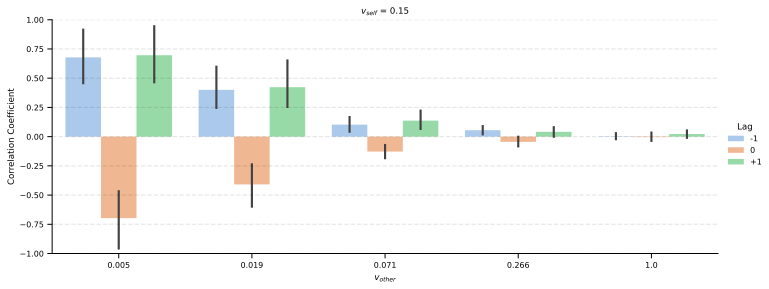

In [44]:
g = sns.catplot(data=df_m, col=r'$v_{self}$', x=r'$v_{other}$', y='Corr. Coef.', hue='Lag', kind='bar', palette='pastel', facet_kws={'ylim':[vmin, vmax]},
                 height=4, aspect=2.5)
axs = g.axes[0]
for ax in axs:
    for v in np.arange(-1, 1.25, .25):
        ax.axhline(v, c='k', ls='--', alpha=0.1)
axs[0].set_ylabel('Correlation Coefficient');